In [1]:
import torch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
train_dataset = torchvision.datasets.MNIST(
    root = './data',
    train = True,
    transform = torchvision.transforms.ToTensor(),
    download = True
)

test_dataset = torchvision.datasets.MNIST(
    root = './data',
    train = False,
    transform = torchvision.transforms.ToTensor(),
    download = False
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:10<00:00, 978294.96it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 160425.29it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1515220.01it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3581599.69it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
batch_size = 100

train_loader = torch.utils.data.DataLoader(
    dataset = train_dataset,
    batch_size = batch_size,
    shuffle = True
)

test_loader = torch.utils.data.DataLoader(
    dataset = test_dataset,
    batch_size = batch_size,
    shuffle = False
)

In [5]:
for features, labels in train_loader:
  print(features.shape, labels.shape)
  break

torch.Size([100, 1, 28, 28]) torch.Size([100])


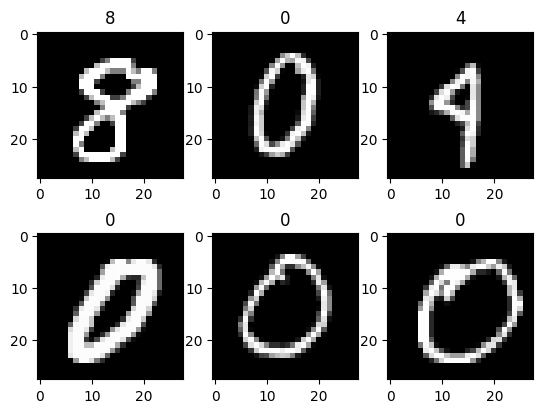

In [6]:
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(features[i][0], cmap = 'gray')
  plt.title(labels[i].item())

In [14]:
class NeuralNetwork(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNetwork, self).__init__()

    self.input_size = input_size
    self.hidden_size = hidden_size
    self.num_classes = num_classes

    self.layer1 = nn.Linear(self.input_size, self.hidden_size)
    self.relu = nn.ReLU()
    self.layer2 = nn.Linear(self.hidden_size, self.num_classes)

  def forward(self, x):
      self.output = self.layer1(x)
      self.output = self.relu(self.output)
      self.output = self.layer2(self.output)
      return self.output

input_size = 784
hidden_size = 100
num_classes = 10

model = NeuralNetwork(input_size, hidden_size, num_classes)

In [15]:
learning_rate = 1e-3
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [20]:
epochs = 2
for epoch in range(epochs):
  for images, labels in train_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    outputs = model(images)
    loss = loss_function(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  if epoch % 1 == 0:
      print(f'epoch : {epoch + 1}/{epochs} | loss : {loss.item() : .4f}')

with torch.no_grad():
    correct_samples = 0
    total_samples = 0

    for images, labels in test_loader:
      images = images.reshape(-1, 28*28).to(device)
      labels = labels.to(device)

      outputs = model(images)
      _, predictions = torch.max(outputs, 1)
      total_samples += labels.shape[0]
      correct_samples += (predictions == labels).sum().item()

    accuracy = 100 * correct_samples / total_samples
    print(f'accuracy : {accuracy}')

epoch : 1/2 | loss :  0.1004
epoch : 2/2 | loss :  0.0124
accuracy : 97.71
